# Liu et al., (2016) radial diffusion coefficients
Reproducing to Figure 3 from the paper

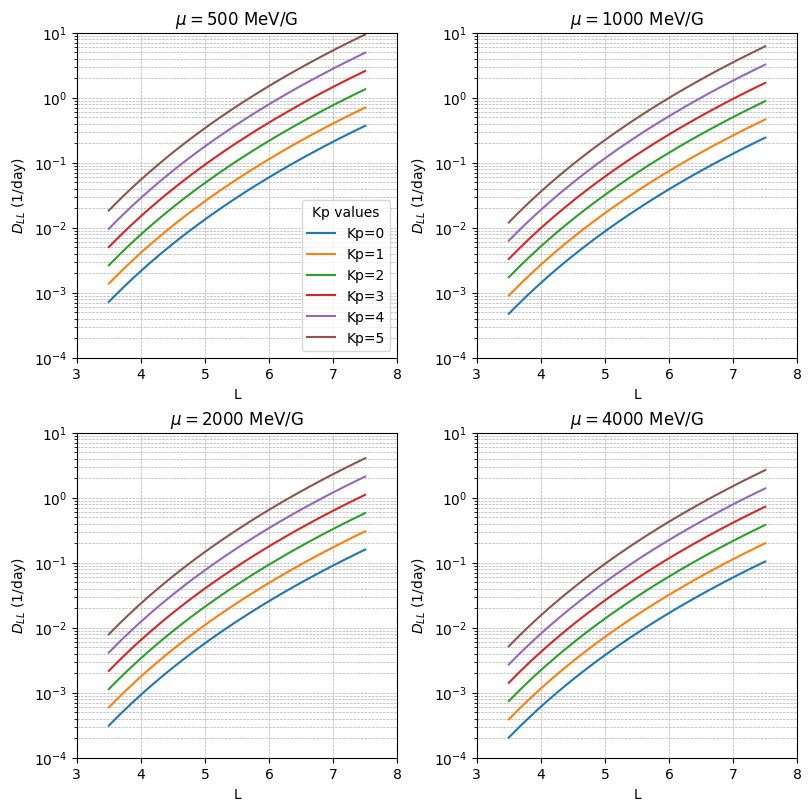

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from rbamlib.models.dll import L2016  # Ensure this library is available

# Define the range of L and Kp values
L = np.arange(3.5, 7.6, 0.1)
kp_values = np.arange(0, 6)
mu_values = [500, 1000, 2000, 4000]

# Set up the subplots side by side
fig, axs = plt.subplots(2, 2, figsize=(8, 8), constrained_layout=True)
axs = axs.ravel()

legend_ax = axs[0]  # Choose one axis (e.g., top-left) for the legend

# Common settings for both plots
for ax, mu in zip(axs, mu_values):
    ax.set(xscale="linear", yscale="log", xlim=(3, 8), ylim=(1e-4, 1e1))
    ax.set_xticks(range(3, 9))  # Set specific tick positions
    ax.set_yticks(np.logspace(-4, 1, 6))
    ax.set_xticklabels(map(str, range(3, 9))) # Set custom tick labels
    ax.set_xlabel('L')
    ax.set_ylabel('$D_{LL}$ (1/day)')
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)
    ax.set_title(rf"$\mu={mu}$ MeV/G")   

    for kp in kp_values:
        # Only electric L2016 
        dlle = L2016(L=L, kp=kp, mu=mu)
        
        # Plot results    
        ax.plot(L, dlle, label=f"Kp={kp}")

# Add legend only to the chosen subplot
legend_ax.legend(title="Kp values", loc="lower right")

# Show the combined plot
plt.show()